# Assignment 5 - Digit multiclass classification

## Requirements
    (1) Begin by fitting a random forest classifier using the full set of 784 explanatory variables and the model training set (train.csv). Record the time it takes to fit the model and then evaluate 
    the model on the test.csv data by submitting to Kaggle.com. Provide your Kaggle.com score and user ID.
    
    (2) Execute principal components analysis (PCA) on the combined training and test set data together, generating principal components that represent 95 percent of the variability in the explanator 
    variables. The number of principal components in the solution should be substantially fewer than the 784 explanatory variables. Record the time it takes to identify the principal components.
    
    (3) Using the identified principal components from step (2), use the train.csv to build another random forest classifier. Record the time it takes to fit the model and to evaluate the model on 
    the test.csv data by submitting to Kaggle.com. Provide your Kaggle.com score and user ID.

    (4) Submit both the RF Classifier and the PCA RF Classifier to Kaggle.com, and report both scores along with your user name.  I MUST have your user name to verify submission status.

    (5) The experiment we have proposed has a MAJOR design flaw. Identify the flaw. Fix it. Rerun the experiment in a way that is consistent with a training-and-test regimen, and submit this to 
    Kaggle.com. Provide your Kaggle.com score and user ID.

    (6)  Use k-means clustering to group MNIST observations into 1 of 10 categories and then assign labels. 

#### Report total elapsed time measures for the training set analysis.  It is sufficient to run a single time-elapsed test for this assignment. In practice, we might consider the possibility of repeated executions of the relevant portions of the programs, much as the Benchmark Example programs do. Some code that might help you with reporting elapsed total time follows. 

    start=datetime.now()
    rf2.fit(trainimages,labels)
    end=datetime.now()
    print(end-start)  

# Management Problem
From a management perspective, the predictive accuracy of models must be weighed against the costs of model development and implementation. Suppose you were the manager of a data science team responsible for implementing models for computer vision (classification of images analogous to the MINST problem). Would you recommend using PCA as a preliminary to machine learning classification? Explain your thinking.

# Discussion

From the observations of the experiment below the PCA reduction of features does cost the user some time as does refitting and predicing the labels of the training data. Interestingly despite having a reduced number of features it was observed that the time required to fit the model was longer. The chaining of techniques (PCA followed by random forest classifcation) did result in an improvement in homogeneity, completeness and the F1 score micro average (micro average was used because the classes were slightly imbalanced) as such I would recommend using this method. Additionally from this exercise it was found that the performance of kmeans for classification of digits was rather poor. As such it is not recommended for use. Summary scores, confusion matricies, time elapsed, are availible for viewing in the report below. The use of kmeans for classification of MINST data is availible in the sklearn documentation (https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html), however, the built-in dataset varies signficantly in number (one could also assume that it differs in variance). When practicing the same workflow as described within the above reference similar results were obtained for homogenaity with the builtin dataset. The kaggle dataset perfromance was much lower in terms of homogeneity. 

In [66]:

# import base packages into the namespace for this program
import numpy as np
import pandas as pd
from scipy import stats
from datetime import datetime

#diplay and plotting
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import scikitplot as skplt
#import from SKlearn

from sklearn.ensemble import  RandomForestClassifier
from sklearn.cluster import KMeans
 
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV

from sklearn.decomposition import PCA
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.metrics import homogeneity_score
from sklearn.metrics import completeness_score
from sklearn.metrics import f1_score

from sklearn.pipeline import Pipeline



# read data for the Boston Housing Study
Digit_input = pd.read_csv("C:/Users/bblank/Documents/Northwestern MSDS/datasets/Digits-Train.csv")
Digit_test = pd.read_csv("C:/Users/bblank/Documents/Northwestern MSDS/datasets/test.csv")
#sets random seed for entire notebook
RANDOM_SEED = 1

#kfold for CV of models
kfold = KFold(n_splits=5, random_state=RANDOM_SEED)
testkfold = KFold(n_splits=2, random_state=RANDOM_SEED)

In [67]:
#get counts of the labels, check for balance
Digit_input.label.value_counts().sort_values()

5    3795
8    4063
4    4072
0    4132
6    4137
2    4177
9    4188
3    4351
7    4401
1    4684
Name: label, dtype: int64

In [68]:
#splits into validation and train.
train, val =  train_test_split(Digit_input, test_size = 0.2, random_state = RANDOM_SEED)


y_train = train.label.copy()
X_train = train.drop('label', axis=1)




In [69]:
y_val = val.label.copy()
X_val = val.drop('label', axis=1)

In [70]:
print(train.label.value_counts())
print(val.label.value_counts())

1    3744
7    3551
3    3478
9    3345
2    3342
6    3337
0    3279
4    3243
8    3217
5    3064
Name: label, dtype: int64
1    940
3    873
0    853
7    850
8    846
9    843
2    835
4    829
6    800
5    731
Name: label, dtype: int64


In [71]:

print(X_train.columns)
print(y_train.name)

Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)
label


## (1) Begin by fitting a random forest classifier using the full set of 784 explanatory variables and the model training set (train.csv). 
    Record the time it takes to fit the model and then evaluate the model on the test.csv data by submitting to Kaggle.com. Provide your Kaggle.com score and user ID.

In [72]:
### Quick grid search; saved for posterity.

#param_grid = dict(regressor__n_estimators=[50], regressor__max_depth= [10], regressor__max_leaf_nodes= [200,400])

#gForest_pipe = Pipeline([
#        ('regressor', RandomForestClassifier(n_jobs=-1))
#        ])

#grid_forest = GridSearchCV(gForest_pipe, param_grid, cv=10, verbose=1)
#grid_forest.fit(X_val, y_val)
#grid_forest.best_params_

In [73]:
Forest_pipe = Pipeline([
        ('regressor', RandomForestClassifier(n_estimators = 50, max_depth=10, max_features = 'sqrt', max_leaf_nodes =400,  random_state= RANDOM_SEED))
        ])
now = datetime.now()      
Forest_pipe.fit(X_train, y_train)
after_fit = datetime.now()

forest_Train_pred =Forest_pipe.predict(X_train)

In [74]:
elapsed = after_fit-now
Forest_elapsed = elapsed.total_seconds()

In [75]:
print(Forest_elapsed, 'seconds')

5.9262 seconds


<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

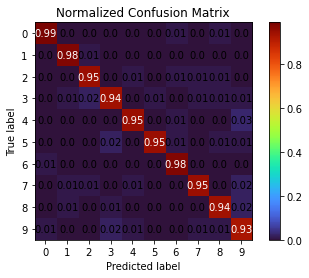

In [76]:
skplt.metrics.plot_confusion_matrix(y_train, forest_Train_pred, normalize=True, cmap='turbo')

In [77]:
print(f"Classification report for classifier {Forest_pipe}:\n"
      f"{metrics.classification_report(y_train, forest_Train_pred)}\n")

Classification report for classifier Pipeline(steps=[('regressor',
                 RandomForestClassifier(max_depth=10, max_features='sqrt',
                                        max_leaf_nodes=400, n_estimators=50,
                                        random_state=1))]):
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3279
           1       0.96      0.98      0.97      3744
           2       0.95      0.95      0.95      3342
           3       0.95      0.94      0.95      3478
           4       0.96      0.95      0.95      3243
           5       0.98      0.95      0.96      3064
           6       0.96      0.98      0.97      3337
           7       0.96      0.95      0.95      3551
           8       0.95      0.94      0.94      3217
           9       0.91      0.93      0.92      3345

    accuracy                           0.96     33600
   macro avg       0.96      0.96      0.96     33600
weighted avg     

In [78]:
test_label = Forest_pipe.predict(Digit_test)

len(test_label)

ImageId = np.linspace(1,len(test_label),len(test_label))

labels = pd.DataFrame({"ImageId": ImageId, "Label": test_label})

In [79]:
Forest_completeness = completeness_score(y_train, forest_Train_pred)
Forest_homogeneity = homogeneity_score(y_train, forest_Train_pred)
Forest_F1 = f1_score(y_train, forest_Train_pred, average='micro')


### Kaggle Summary

In [80]:
labels.to_csv('Forrestsubmission.csv' ,index=False)
userID = 'BEBlank'
score = 93.715
Forest_info = [userID, score, Forest_elapsed]

## (2) Execute principal components analysis (PCA) on the combined training and test set data together, generating principal components that represent 95 percent of the variability in the explanator variables. 
    The number of principal components in the solution should be substantially fewer than the 784 explanatory variables. Record the time it takes to identify the principal components.

## (3) Using the identified principal components from step (2), use the train.csv to build another random forest classifier. 
    Record the time it takes to fit the model and to evaluate the model on the test.csv data by submitting to Kaggle.com. Provide your Kaggle.com score and user ID.

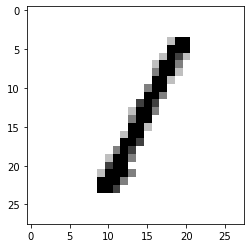

In [81]:
#gets first image and makes a plot of what the image is.
original = np.array(X_train.iloc[0, :])

original_image = original.reshape(28,28)
plt.imshow(original_image, cmap='binary')

In [82]:
pca = PCA(n_components=0.95)
now = datetime.now()
reduced = pca.fit_transform(X_train)
after = datetime.now()

elapsed = after-now
componentID_elapsed = elapsed.total_seconds()

In [83]:
components_95 = reduced.shape[1]

In [84]:
print('there are', components_95, 'components required to represent 95% of the variance')
print(componentID_elapsed, 'seconds were required to reduce the dimensionality')

there are 153 components required to represent 95% of the variance
2.331765 seconds were required to reduce the dimensionality


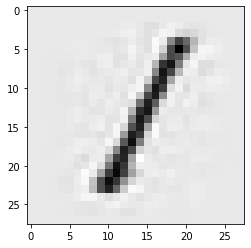

In [85]:
#decompress the digits after downselecting the principle components/ dimensions
recovered = pca.inverse_transform(reduced)
#gets the first decompressed digit and plots it
digit= recovered[0, :]
digit_image = digit.reshape(28,28)
plt.imshow(digit_image, cmap='binary')

In [86]:
### I did some work here to re-grid search for the PCA downseleted features. I decided against doing this because it makes it harder for direct comparison

#param_grid = dict(regressor__n_estimators=[75,200], regressor__max_depth= [20,40], regressor__max_leaf_nodes= [400])

#gForest_pipe = Pipeline([
#        ('regressor', RandomForestClassifier(n_jobs=-1))
#        ])
#grid_forest = GridSearchCV(gForest_pipe, param_grid, cv=10, verbose=1)
#grid_forest.fit(recovered, y_train)
#grid_forest.best_params_

#reduced_pipe = Pipeline([
#        ('regressor', RandomForestClassifier(n_estimators = 200, max_depth=20, max_leaf_nodes =400,  random_state= RANDOM_SEED))
#        ])

#reduced_pipe.fit(reduced, y_train)
#reduced_Train_pred =reduced_pipe.predict(reduced)

In [87]:
# fits the reduced data; collectes time statistics.
before = datetime.now()      
Forest_pipe.fit(reduced, y_train)
after = datetime.now()

elapsed = after - before
reduced_elapsed = elapsed.total_seconds()


reduced_Train_pred =Forest_pipe.predict(reduced)

<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

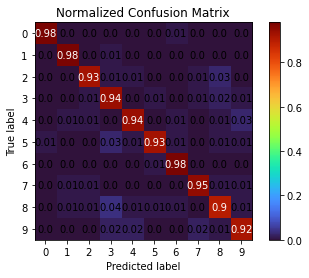

In [88]:


skplt.metrics.plot_confusion_matrix(y_train, reduced_Train_pred, normalize=True, cmap='turbo')

In [89]:
print(f"Classification report for classifier {Forest_pipe}:\n"
      f"{metrics.classification_report(y_train, reduced_Train_pred)}\n")

Classification report for classifier Pipeline(steps=[('regressor',
                 RandomForestClassifier(max_depth=10, max_features='sqrt',
                                        max_leaf_nodes=400, n_estimators=50,
                                        random_state=1))]):
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3279
           1       0.97      0.98      0.97      3744
           2       0.94      0.93      0.94      3342
           3       0.90      0.94      0.92      3478
           4       0.96      0.94      0.95      3243
           5       0.96      0.93      0.94      3064
           6       0.95      0.98      0.97      3337
           7       0.95      0.95      0.95      3551
           8       0.90      0.90      0.90      3217
           9       0.92      0.92      0.92      3345

    accuracy                           0.94     33600
   macro avg       0.94      0.94      0.94     33600
weighted avg     

In [90]:
#gets scores for reduced training data
Forest_PCA_completeness = completeness_score(y_train, reduced_Train_pred)
Forest_PCA_homogeneity = homogeneity_score(y_train, reduced_Train_pred)
Forest_PCA_F1 = f1_score(y_train, reduced_Train_pred, average='micro')

In [91]:
#builds a pipeline out of the decompressed data; need to decompress to label test set.
reduced_pipe = Pipeline([
        ('regressor', RandomForestClassifier(n_estimators = 50, max_depth=10, max_features = 'sqrt', max_leaf_nodes =400,  random_state= RANDOM_SEED))
        ])
before = datetime.now()      
reduced_pipe.fit(recovered, y_train)
after = datetime.now()

elapsed = after - before
recovered_elapsed = elapsed.total_seconds()
#(n_estimators = 200, max_depth=20, max_leaf_nodes =400,  random_state= RANDOM_SEED)
recovered_train_pred = reduced_pipe.predict(recovered)

<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

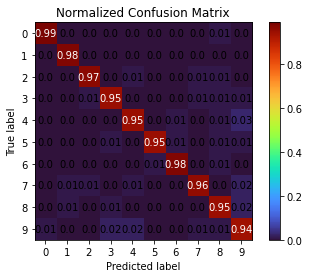

In [92]:
skplt.metrics.plot_confusion_matrix(y_train, recovered_train_pred, normalize=True, cmap='turbo')

In [93]:
print(f"Classification report for classifier {reduced_pipe}:\n"
      f"{metrics.classification_report(y_train, recovered_train_pred)}\n")

Classification report for classifier Pipeline(steps=[('regressor',
                 RandomForestClassifier(max_depth=10, max_features='sqrt',
                                        max_leaf_nodes=400, n_estimators=50,
                                        random_state=1))]):
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3279
           1       0.97      0.98      0.98      3744
           2       0.97      0.97      0.97      3342
           3       0.96      0.95      0.95      3478
           4       0.95      0.95      0.95      3243
           5       0.98      0.95      0.97      3064
           6       0.98      0.98      0.98      3337
           7       0.97      0.96      0.96      3551
           8       0.95      0.95      0.95      3217
           9       0.92      0.94      0.93      3345

    accuracy                           0.96     33600
   macro avg       0.96      0.96      0.96     33600
weighted avg     

In [94]:
#generates necessary data for kaggle
test_PCAreduced_label = reduced_pipe.predict(Digit_test)

ImageId = np.linspace(1,len(test_PCAreduced_label),len(test_PCAreduced_label))

labels = pd.DataFrame({"ImageId": ImageId, "Label": test_PCAreduced_label})

In [95]:
labels.to_csv('submissionPCAreduced.csv' ,index=False)
userID = 'BEBlank'
score = 'x'
reduced_Forest_info = [userID, score, reduced_elapsed]

In [96]:
# collects scores for recovered classification
Forest_PCARecovered_completeness = completeness_score(y_train, recovered_train_pred)
Forest_PCARecovered_homogeneity = homogeneity_score(y_train, recovered_train_pred)
Forest_PCARecovered_F1 = f1_score(y_train, recovered_train_pred, average='micro')

In [97]:
print(Forest_elapsed)
print(reduced_elapsed)

5.9262
14.456348


In [98]:
#generates dataframe for submission to kaggle
test_recovered_label = reduced_pipe.predict(Digit_test)
ImageId = np.linspace(1,len(test_recovered_label),len(test_recovered_label))
labels = pd.DataFrame({"ImageId": ImageId, "Label": test_recovered_label})

In [99]:
labels.to_csv('submissionPCA-recovered.csv' ,index=False)
userID = 'BEBlank'
score = 93.717
recovered_Forest_info = [userID, score, reduced_elapsed]

## (5) The experiment we have proposed has a MAJOR design flaw. Identify the flaw. Fix it. Rerun the experiment in a way that is consistent with a training-and-test regimen, and submit this to 
Kaggle.com. Provide your Kaggle.com score and user ID.

    I had split the original training dataset into a small validation hold out so I could test the models on a subset of labeled data. Here is a confusion matrix for that intial holdout set.
    Additionally, there wasn't an established metric for measuring success. Three are provide here, homogeneity, completeness, and the f1 score for the classifications above.

In [100]:
Forest_pipe = Pipeline([
        ('regressor', RandomForestClassifier(n_estimators = 50, max_depth=10, max_features = 'sqrt', max_leaf_nodes =400,  random_state= RANDOM_SEED))
        ])   
Forest_pipe.fit(X_train, y_train)

Pipeline(steps=[('regressor',
                 RandomForestClassifier(max_depth=10, max_features='sqrt',
                                        max_leaf_nodes=400, n_estimators=50,
                                        random_state=1))])

<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

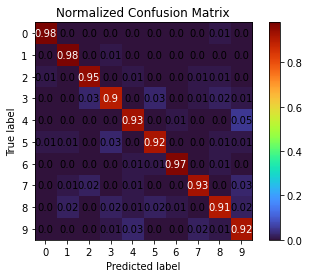

In [101]:
forest_val_pred =Forest_pipe.predict(X_val)
skplt.metrics.plot_confusion_matrix(y_val, forest_val_pred, normalize=True, cmap='turbo')


In [102]:
val_PCARecovered_completeness = completeness_score(y_train, recovered_train_pred)
val_PCARecovered_homogeneity = homogeneity_score(y_train, recovered_train_pred)
val_PCARecovered_F1 = f1_score(y_train, recovered_train_pred, average='micro')

In [103]:
data2 = {'Case': ['RandomForrest(Train)', 'PCA+RandomForest(Train 153 features)', 'PCA+RandomForest(Train recovered features)', 'RandomForest(Val holdout)'], 
    'completeness': [Forest_completeness, Forest_PCA_completeness, Forest_PCARecovered_completeness, val_PCARecovered_completeness],
    'homogeneity': [Forest_homogeneity, Forest_PCA_homogeneity, Forest_PCARecovered_homogeneity, val_PCARecovered_homogeneity],
    'micro_F1 average': [Forest_F1, Forest_PCA_F1 ,Forest_PCARecovered_F1,val_PCARecovered_F1],
    'elapsed time (s)': [Forest_info[2],reduced_Forest_info[2] , recovered_Forest_info[2] ,'NA']}







In [104]:
score_df = pd.DataFrame.from_dict(data2)
print('\t \t \t \t \t','--------Score Summary Table--------', '\n \n', score_df.to_string(index=False))

	 	 	 	 	 --------Score Summary Table-------- 
 
                                       Case  completeness  homogeneity  micro_F1 average elapsed time (s)
                      RandomForrest(Train)      0.889125     0.888926          0.955714           5.9262
      PCA+RandomForest(Train 153 features)      0.865058     0.864796          0.943988        14.456348
PCA+RandomForest(Train recovered features)      0.900986     0.900860          0.961577        14.456348
                 RandomForest(Val holdout)      0.900986     0.900860          0.961577               NA


## (6)  Use k-means clustering to group MNIST observations into 1 of 10 categories and then assign labels. 
    using PCA features first

     ("scaler", StandardScaler()),

In [105]:
constant_k = 10

kmeans_pipe = Pipeline([
    ("kmeans", KMeans(n_clusters=constant_k, n_init = 30, random_state= RANDOM_SEED))])
### See page 253
now = datetime.now()
transformed = kmeans_pipe.fit_transform(recovered)
after = datetime.now()




elapsed = after-now
kmeans_reduced_elapsed = elapsed.total_seconds()
kmeans_reduced_elapsed

71.407062

In [106]:
representative_digit_idx = np.argmin(transformed, axis=0)

In [107]:
representative_digit_idx
X_representative_digits = X_train.iloc[representative_digit_idx]

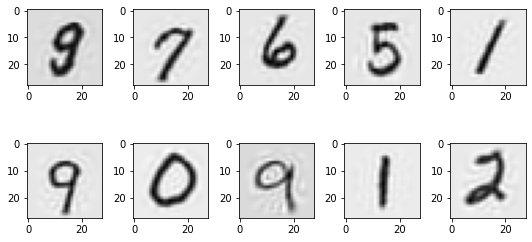

In [108]:
recovered_df = pd.DataFrame(recovered)
num_row = 2
num_col = 5
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(constant_k):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(np.array(recovered_df.iloc[representative_digit_idx[i]]).reshape(28,28), cmap='gray_r')
    #ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

## We can see here that not all of the digits are identified as representative digits of a class (3,4, and 8 are missing)

# K means on non-PCA data

In [109]:
X_train.shape

(33600, 784)

In [110]:

now = datetime.now()
transformed = kmeans_pipe.fit_transform(X_train)
after = datetime.now()




In [111]:
representative_digit_idx = np.argmin(transformed, axis=0)
X_representative_digits = transformed[representative_digit_idx]

elapsed = after-now
kmeans_native_elapsed = elapsed.total_seconds()
kmeans_native_elapsed

75.716575

In [112]:
representative_digit_idx

array([16023,  4648, 25002,  1216, 13885,  4692,  1586, 19826, 17150,
       23080], dtype=int64)

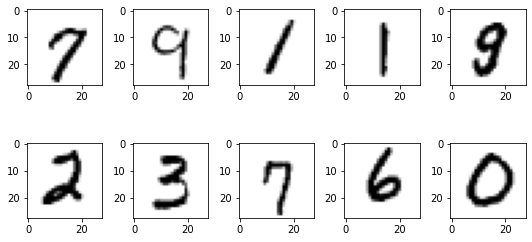

In [113]:
num_row = 2
num_col = 5
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(len(X_representative_digits)):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(np.array(X_train.iloc[representative_digit_idx[i]]).reshape(28,28), cmap='gist_yarg')
    #ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

## From the above we see that the most representative 10 digits of the 10 clusters fail to identify all of the digits (4, 5,  and 8 are again missing as representatives).

    Let's fit it anyway even thought this will be bad.  

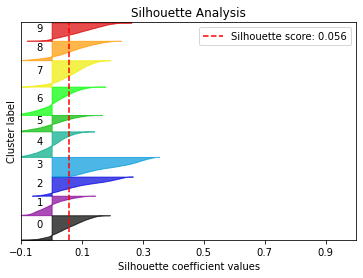

In [114]:
kmeans_X_train_preds = kmeans_pipe.predict(X_train)
skplt.metrics.plot_silhouette(X_train, kmeans_X_train_preds)
plt.show()

    Silhouette plot is showing substantial number observations as negative.

<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

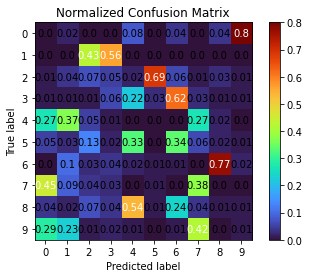

In [115]:
skplt.metrics.plot_confusion_matrix(y_train, kmeans_X_train_preds, normalize=True, cmap='turbo')

In [116]:
Kmeans_completeness = completeness_score(y_train, kmeans_X_train_preds)
Kmeans_homogeneity = homogeneity_score(y_train, kmeans_X_train_preds)
Kmeans_F1 = f1_score(y_train, kmeans_X_train_preds, average='micro')

In [117]:
data3 = {'Case': ['RandomForrest(Train)', 'PCA+RandomForest(Train 153 features)', 'PCA+RandomForest(Train recovered features)', 'RandomForest(Val holdout)', 'Kmeans'], 
    'completeness': [Forest_completeness, Forest_PCA_completeness, Forest_PCARecovered_completeness, val_PCARecovered_completeness, Kmeans_completeness],
    'homogeneity': [Forest_homogeneity, Forest_PCA_homogeneity, Forest_PCARecovered_homogeneity, val_PCARecovered_homogeneity,Kmeans_homogeneity],
    'micro_F1 average': [Forest_F1, Forest_PCA_F1 ,Forest_PCARecovered_F1,val_PCARecovered_F1,Kmeans_F1],
    'elapsed time (s)': [Forest_info[2],reduced_Forest_info[2] , recovered_Forest_info[2] ,'NA', kmeans_native_elapsed]}

In [118]:
score2_df = pd.DataFrame.from_dict(data3)
print('\t \t \t \t \t','--------Score Summary Table--------', '\n \n', score2_df.to_string(index=False))

	 	 	 	 	 --------Score Summary Table-------- 
 
                                       Case  completeness  homogeneity  micro_F1 average elapsed time (s)
                      RandomForrest(Train)      0.889125     0.888926          0.955714           5.9262
      PCA+RandomForest(Train 153 features)      0.865058     0.864796          0.943988        14.456348
PCA+RandomForest(Train recovered features)      0.900986     0.900860          0.961577        14.456348
                 RandomForest(Val holdout)      0.900986     0.900860          0.961577               NA
                                    Kmeans      0.483559     0.480567          0.056637        75.716575
